Importing Libraries

In [26]:
import pandas as pd
import numpy as np

Choose Dataset file from Local Directory

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Wine_Quality_Data.csv to Wine_Quality_Data.csv


Load Dataset

In [3]:
dataset = pd.read_csv('Wine_Quality_Data.csv')

In [4]:
print(dataset)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  

Summarize Dataset

In [5]:
print(dataset.shape)
print(dataset.head(5))

(6497, 13)
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5

Coverting text to binary value

In [14]:
income_set = set(dataset['color'])
dataset['color'] = dataset['color'].map({'red':0, 'white':1}).astype(int)
print(dataset.head)

<bound method NDFrame.head of       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020  

Segragate Dataset int X & Y

In [15]:
X = dataset.iloc[:, :-1].values
X

array([[ 7.4 ,  0.7 ,  0.  , ...,  0.56,  9.4 ,  5.  ],
       [ 7.8 ,  0.88,  0.  , ...,  0.68,  9.8 ,  5.  ],
       [ 7.8 ,  0.76,  0.04, ...,  0.65,  9.8 ,  5.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]])

In [16]:
Y = dataset.iloc[:, -1].values
Y

array([0, 0, 0, ..., 1, 1, 1])

Splitting Dataset into Train & Test

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[-0.08802117 -0.72820076  0.00517689 ... -1.00933084 -0.75281497
   0.20911623]
 [-0.78538358 -1.09072305  0.07390119 ... -0.47886052  0.34073703
   1.36031877]
 [-0.39796002 -0.60736    -0.13227171 ...  0.38315375  0.67721458
   2.51152131]
 ...
 [-0.32047531 -0.84904152  1.86073296 ... -1.00933084 -1.1734119
   0.20911623]
 [-0.47544473 -0.72820076  0.34879839 ...  0.11791859 -0.16397928
   1.36031877]
 [ 1.15173422 -0.72820076  0.69241988 ... -0.67778689 -0.41633743
  -0.94208632]]


Training

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # loading the algorithm
model.fit(X_train, y_train) # train

LogisticRegression()

Predict for all Test Data

In [20]:
y_pred = model.predict(X_test)

Evaluating the model

In [21]:
from sklearn.metrics import accuracy_score
print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy of the Model: 99.44615384615385%


Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)

Confusion Matrix: 
[[ 388    4]
 [   5 1228]]


Predicting whether the wine is red or white

In [ ]:
# fixed_acidity = float(input("Enter fixed_acidity: "))
# volatile_acidity = float(input("Enter volatile_acidity: "))
# citric_acid = float(input("Enter citric_acid: "))
# residual_sugar = float(input("Enter residual_sugar: "))
# chlorides = float(input("Enter chlorides: "))
# free_sulfur_dioxide = float(input("Enter free_sulfur_dioxide: "))
# total_sulfur_dioxide = float(input("Enter total_sulfur_dioxide: "))
# density = float(input("Enter density: "))
# pH = float(input("Enter pH: "))
# sulphates = float(input("Enter sulphates: "))
# alcohol = float(input("Enter alcohol: "))
# quality = int(input("Enter quality: "))
# newWine = [[fixed_acidity, volatile_acidity, citric_acid, residual_sugar, 
#             chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, 
#             pH, sulphates, alcohol, quality]]

# result = model.predict(sc.transform(newWine))

# print(result)

# if result == 'red':
#   print("The wine is red.")
# else:
#   print("The wine is white")

Enter fixed_acidity: 6.5
Enter volatile_acidity: 0.22
Enter citric_acid: 0.5
Enter residual_sugar: 16.4
Enter chlorides: 0.048
Enter free_sulfur_dioxide: 36
Enter total_sulfur_dioxide: 182
Enter density: 0.99904
Enter pH: 3.02
Enter sulphates: 0.49
Enter alcohol: 8.8
Enter quality: 6
['white']
The wine is white


Receiver Operating Curve - ROC Curve

NO skill: ROC AUC=50.000
Logistic skill: ROC AUC=99.907


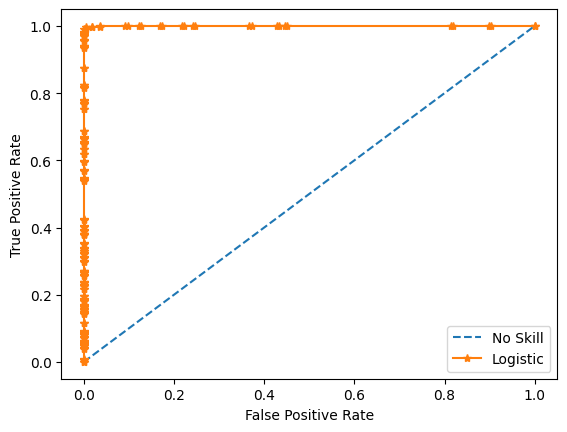

In [22]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

nsProbability = [0 for _ in range(len(y_test))]
lsProbability = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lsProbability = lsProbability[:, 1]
# calculate score
nsAUC = roc_auc_score(y_test, nsProbability)
lsAUC = roc_auc_score(y_test, lsProbability)
# summarize score
print("NO skill: ROC AUC=%.3f" % (nsAUC*100))
print("Logistic skill: ROC AUC=%.3f" % (lsAUC*100))
# calculate roc curves
nsFP, nsTP, _ = roc_curve(y_test, nsProbability)
lrFP, lrTP, _ = roc_curve(y_test, lsProbability)
# plot the roc curve for the model
plt.plot(nsFP, nsTP, linestyle='--', label='No Skill')
plt.plot(lrFP, lrTP, marker='*', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.show()

Cross Validation Score

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)
result = cross_val_score(model, X, Y, cv=kfold)
print("CROSS VALIDATION SCORE: %.2f%%" % (result.mean()*100.0))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

CROSS VALIDATION SCORE: 97.23%


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Stratifield K-fold Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=3)
model_skfold = LogisticRegression()
results_skfold = cross_val_score(model_skfold, X, Y, cv=skfold)
print("STRATIFIED K-FOLD SCORE: %.2f%%" % (results_skfold.mean()*100.0))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

STRATIFIED K-FOLD SCORE: 97.86%


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cumulative Accuracy Profile (CAP) Curve

1233


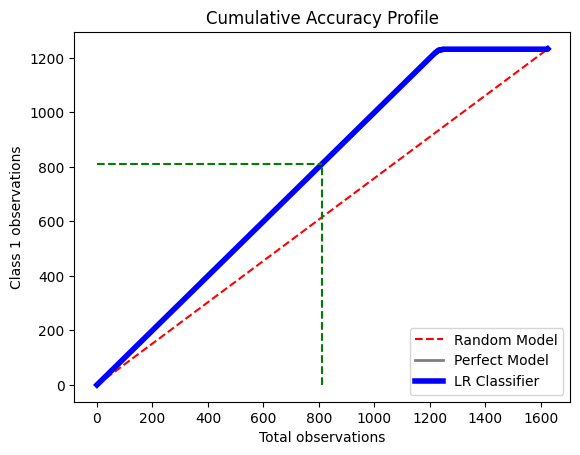

In [27]:
total = len(y_test)
class_1_count = np.sum(y_test)
print(class_1_count)
class_0_count = total - class_1_count
plt.plot([0, total], [0, class_1_count], c='r', linestyle='--', label='Random Model')
plt.plot([0, class_1_count, total], 
         [0, class_1_count, class_1_count], 
         c='grey', 
         linewidth=2, 
         label='Perfect Model')
probs = model.predict_proba(X_test)
probs = probs[:, 1]
model_y = [y for _ , y in sorted(zip(probs, y_test), reverse=True)]
y_values = np.append([0], np.cumsum(model_y))
x_values = np.arange(0, total+1)

plt.plot(x_values, y_values, c='b', label='LR Classifier', linewidth=4)
index = int((50*total / 100))

## 50% Vertical line from x-axis
plt.plot([index, index], [0, y_values[index]], c='g', linestyle='--')

## Horizontal line to y-axis from prediction model
plt.plot([0, index], [y_values[index], y_values[index]], c='g', linestyle='--')

class_1_observed = y_values[index] * 100 / max(y_values)
plt.xlabel('Total observations')
plt.ylabel('Class 1 observations')
plt.title('Cumulative Accuracy Profile')
plt.legend(loc = 'lower right')